Learn Data Science, Data Analysis, Machine Learning (Artificial Intelligence) and Python with Tensorflow, Pandas & more!
https://gale.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/17352196?start=0#overview

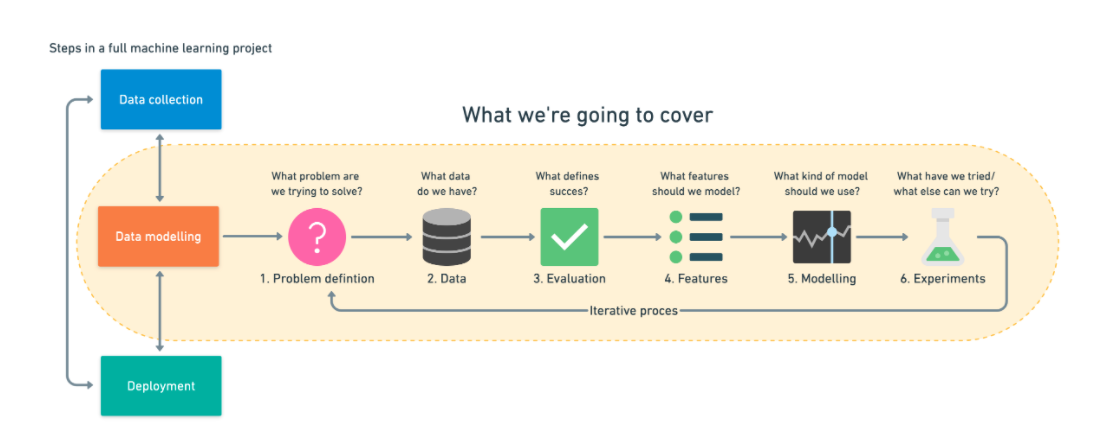

# 1 An end-to-end Scikit-Learn worfklow
# 2 Getting the data ready
# 3 Choosing the right maching learning estimator/aglorithm/model for your problem
# 4 Fitting your chosen machine learning model to data and using it to make a prediction
# 5 Evaluting a machine learning model
# 6 Improving predictions through experimentation (hyperparameter tuning)
# 7 Saving and loading a pretrained model
# 8 Putting it all together in a pipeline

In [1]:
import os
import pandas as pd
import numpy as np
os.chdir(r'C:\Users\Dan\Desktop\python code\data')

heart_disease=pd.read_csv('heart-disease.csv')

In [2]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (featrues matrix)
X = heart_disease.drop('target',axis=1)

In [4]:
#create y (labels)
y= heart_disease['target']

In [5]:
# 3 Choosing the right maching learning estimator/aglorithm/model for  problem

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [7]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 4 Fitting chosen machine learning model to data and using it to make a prediction

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
y_preds = clf.predict(X_test)

In [12]:
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [13]:
# 5 Evaluting a machine learning model

In [14]:
clf.score(X_train,y_train)

1.0

In [15]:
clf.score(X_test,y_test)

0.7868852459016393

In [16]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [17]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [18]:
confusion_matrix(y_test,y_preds)

array([[23,  9],
       [ 4, 25]], dtype=int64)

In [19]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [20]:
# 6 Improving predictions through experimentation (hyperparameter tuning)

In [21]:
np.random.seed(42)
for i in range(10,100,10):
    print(f'trying model with {i} estimators')
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f'model accuract on test set: {clf.score(X_test,y_test) * 100:.2f}%')

trying model with 10 estimators
model accuract on test set: 81.97%
trying model with 20 estimators
model accuract on test set: 75.41%
trying model with 30 estimators
model accuract on test set: 77.05%
trying model with 40 estimators
model accuract on test set: 78.69%
trying model with 50 estimators
model accuract on test set: 86.89%
trying model with 60 estimators
model accuract on test set: 77.05%
trying model with 70 estimators
model accuract on test set: 81.97%
trying model with 80 estimators
model accuract on test set: 80.33%
trying model with 90 estimators
model accuract on test set: 80.33%


In [22]:
# 7 Saving and loading a pretrained model
import pickle
pickle.dump(clf,open('random_forst_model_1.pkl','wb'))

In [23]:
loaded_model= pickle.load(open('random_forst_model_1.pkl','rb'))

In [24]:
loaded_model.score(X_test,y_test)

0.8032786885245902

# 2 Getting the data ready
# three main things we have to do:
    split the data into features and labels (usually x and y)
    filling or disregard missing value (inputing
    convert non numeric values to numerical balues ( feature encoding)
    
    

106. Getting Your Data Ready: Convert Data To Numbers

In [25]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X = heart_disease.drop('target',axis=1)

In [27]:
y = heart_disease['target']

In [28]:
# now split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [29]:
X_train.shape

(242, 13)

In [30]:
#making sure its numeric

os.chdir(r'C:\Users\Dan\Desktop\python code\data')

car_sales=pd.read_csv('car-sales-extended.csv')


In [31]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [32]:
#split into x/y
X=car_sales.drop('Price',axis=1)
y = car_sales['Price']
#split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [33]:

#build model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
'''
model.fit(X_train,y_train)
model.score(X_test,y_test)
 pulls error removing code'''

'\nmodel.fit(X_train,y_train)\nmodel.score(X_test,y_test)\n pulls error removing code'

In [34]:
#turn categories intom numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot=OneHotEncoder()

transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])

In [37]:
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [38]:
#refit model

np.random.seed(41)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
model.score(X_train,y_train)


0.9005173453703567

### what if missing values
1. fill them with some values (imputation)
2. remove the samples with missing data

# 107. Getting Your Data Ready: Handling Missing Values With Pandas

In [40]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [42]:
#option 1 fill missing data with pandas

    
car_sales_missing['Make'].fillna('missing',inplace=True)
car_sales_missing['Colour'].fillna('missing',inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)
car_sales_missing['Doors'].fillna(4,inplace=True)


In [43]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [44]:
# remove rows with missing prive
car_sales_missing.dropna(inplace=True)

In [45]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [46]:
len(car_sales_missing)

950

In [47]:
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [48]:
#turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot=OneHotEncoder()

transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#  3 Choosing the right maching learning estimator/aglorithm/model for your problem

* classification - predicting whether a sample is one thing or another
* regression - predicting a number 
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* GOOD LINK SHOES HOW TO USE 
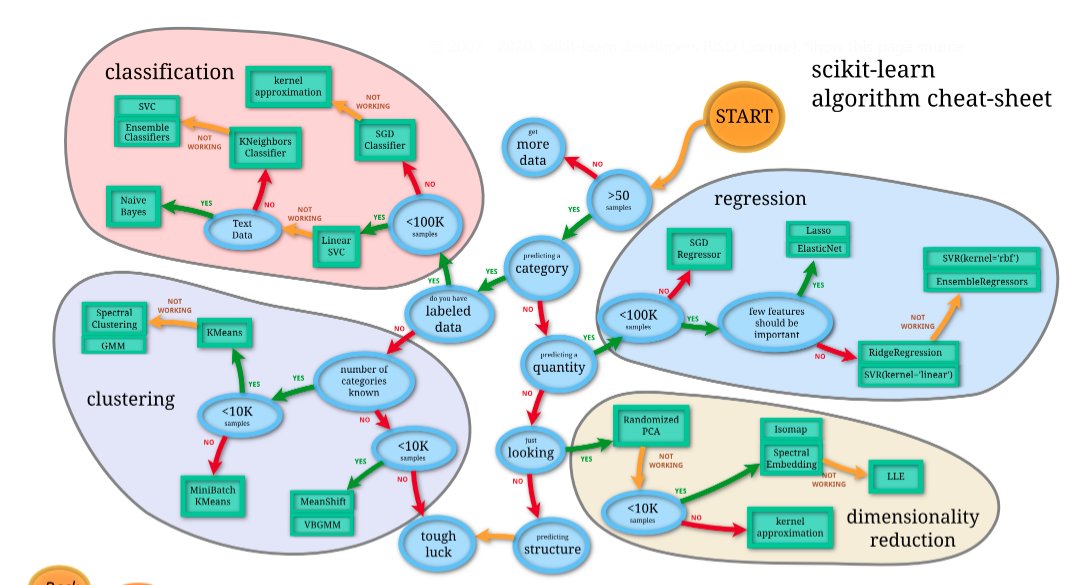


# 3.1 picking a machine learning model for a regression problem

In [49]:
from sklearn.datasets  import load_boston
boston = load_boston()

In [50]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])

In [51]:
from sklearn.linear_model import Ridge
#set up random seed
np.random.seed(42)

#make data
X= boston_df.drop('target',axis=1)
y= boston_df['target']
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instiaite model

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.6662221670168522

In [52]:
# try random forest
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X= boston_df.drop('target',axis=1)
y= boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_model.score(X_test,y_test)


0.873969014117403

# choosing an estimator classification problem

* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 
* 
says use linear svc

In [53]:
os.chdir(r'C:\Users\Dan\Desktop\python code\data')

heart_disease=pd.read_csv('heart-disease.csv')

In [54]:
from sklearn.svm import LinearSVC
np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y= heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = LinearSVC()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

C:\Users\Dan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [55]:
# try random forest classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target',axis=1)
y= heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train)

rf_model.score(X_test,y_test)


0.8524590163934426

# if you have structured data use ensemble method
# if you have unstructured data use deep learning or transfer learning

#  4 Fitting your chosen machine learning model to data and using it to make a prediction

117. Making Predictions With Our Model

 # using it to make a prediction
 2 ways to make prediction:
 * predict()
 * predict_proba()

In [56]:
rf_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
#compare predictions to trusth labels to eval model

y_preds=rf_model.predict(X_test)
np.mean(y_preds ==y_test)

0.8524590163934426

In [59]:
rf_model.score(X_test,y_test)

0.8524590163934426

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [61]:
# make prediction with preict_proba
# returns probabilities of a classifcation label
rf_model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [62]:
'''
89 % of correct | array is 0

18 % of correct

probaba is used to see how model believes they are correct
'''

'\n89 % of correct | array is 0\n\n18 % of correct\n\nprobaba is used to see how model believes they are correct\n'

In [63]:
#lets predict on on same data
rf_model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [64]:
'''
prdeict can also be used in regression

'''

'\nprdeict can also be used in regression\n\n'

In [65]:
from sklearn.ensemble import RandomForestRegressor
#set up random seed
np.random.seed(42)

#make data
X= boston_df.drop('target',axis=1)
y= boston_df['target']
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instiaite model

model = RandomForestRegressor()
model.fit(X_train, y_train)

#make predictions
y_preds= model.predict(X_test)


In [66]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [67]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [68]:
#compare predictions to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

In [69]:
#on avg we are 2.12 away from prediction


#  5 Evaluting a machine learning model
* 120. Evaluating A Machine Learning Model (Score)

# 3 ways to evaluate scikit lern model/estimators
* 1. estimator 'score' method
* 2. 'scoring' parameter
* 3. problem specific metric

In [70]:


# try random forest classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target',axis=1)
y= heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
rf_model.score(X_test,y_test)

0.8524590163934426

In [72]:
rf_model.score(X_train,y_train)

1.0

In [73]:
# do it for regression
from sklearn.ensemble import RandomForestRegressor
#set up random seed
np.random.seed(42)

#make data
X= boston_df.drop('target',axis=1)
y= boston_df['target']
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instiaite model

model = RandomForestRegressor()
model.fit(X_train, y_train)

#make predictions



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
model.score(X_test,y_test)

0.873969014117403

# evalate using scoring method
*121. Evaluating A Machine Learning Model 2 (Cross Validation)

In [75]:


np.random.seed(42)
X = heart_disease.drop('target',axis=1)
y= heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf_model.score(X_test,y_test)

0.8524590163934426

In [77]:
cross_val_score(rf_model, X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

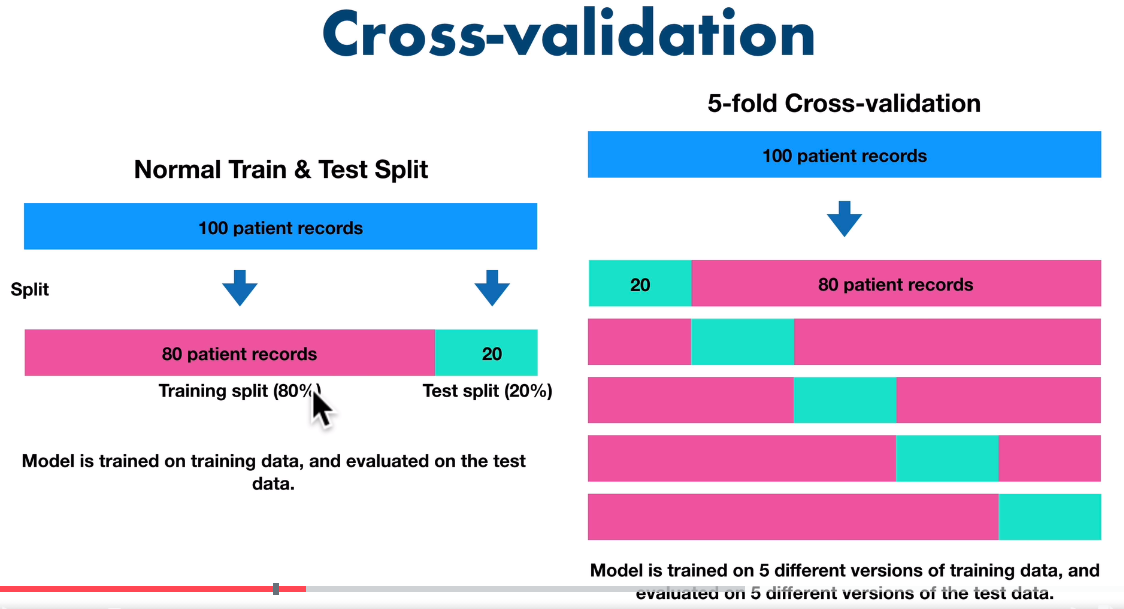# 

In [78]:
np.random.seed(42)
#single train &test split score
rf_model_single_score = rf_model.score(X_test, y_test)

#take the mean 5 fold cross validation score
rf_model_cross_val_score = np.mean(cross_val_score(rf_model,X,y,cv=5))

#compare the two
rf_model_single_score,rf_model_cross_val_score

(0.8524590163934426, 0.8248087431693989)


# 122. Evaluating A Classification Model 1 (Accuracy)

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target',axis=1)
y= heart_disease['target']

rf_model = RandomForestClassifier() 
cross_val_score =cross_val_score(rf_model,X,y, cv=5)

In [83]:
np.mean(cross_val_score)

0.8248087431693989

# 122. Evaluating A Classification Model -

# area under the receiver operating characteristic curve(auc/roc)

Roc curve is true positive rate (TPR), vs. models false positive (FPR) 
* true positive - model predicts 1 when truth is 1
* false positve - model predicts 1 when truth is 0
* true negative - model predicts 0 when truth is 0
* false negative - model predicts 0 when truth is 1


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [87]:
from sklearn.metrics import roc_curve

rf_model.fit(X_train,y_train)
#make predictions with probability 
y_probs = rf_model.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.54, 0.46],
        [0.95, 0.05],
        [0.96, 0.04],
        [0.53, 0.47],
        [0.38, 0.62],
        [0.92, 0.08],
        [0.63, 0.37],
        [0.93, 0.07],
        [0.69, 0.31],
        [0.02, 0.98]]),
 61)

In [89]:
y_probs_positve = y_probs[:,1]
y_probs_positve[:10]

array([0.46, 0.05, 0.04, 0.47, 0.62, 0.08, 0.37, 0.07, 0.31, 0.98])

In [90]:
#calc fpr, tpr, and threshold
fpr, tpr, thresholds= roc_curve(y_test, y_probs_positve)

# check false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.13793103,
       0.13793103, 0.17241379, 0.20689655, 0.27586207, 0.31034483,
       0.31034483, 0.34482759, 0.37931034, 0.55172414, 0.62068966,
       0.65517241, 0.65517241, 0.75862069, 0.82758621, 0.89655172,
       0.96551724, 1.        ])

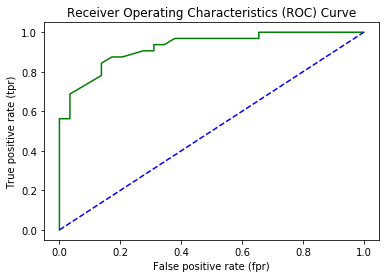

In [92]:
# create a function for pplotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='green',label='ROC')
    plt.plot([0,1],[0,1], color = 'blue', linestyle ='--',label='guessing')
    
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    
plot_roc_curve(fpr,tpr)

In [94]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positve)

0.9251077586206897

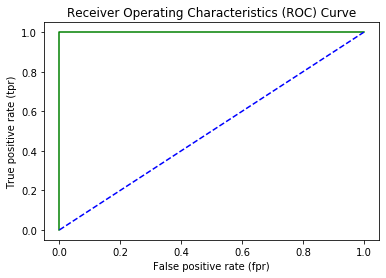

In [95]:
#plt perfect ROC AND auc score
fpr, tpr, thrresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

# Confusion matrix
* a confustion matric is a way to compare a mdel predicts and the actual labels it was supposed to predict.
    * tells you where a model gets confused
* 126. Evaluating A Classification Model 4 (Confusion Matrix)

# 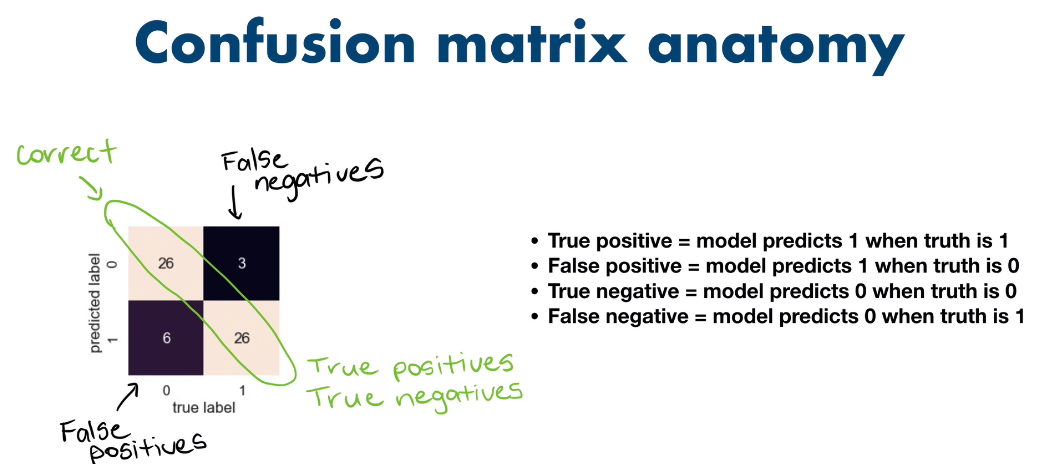

In [101]:
from sklearn.metrics import confusion_matrix
# creat confusion matrix by making predictions
y_preds = rf_model.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [102]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames= ['Actual label'],
           colnames= ['Predicted Labels'])

Predicted Labels,0,1
Actual label,,
0,24,5
1,4,28


We see 5 false  positves | 4 false negatives

* 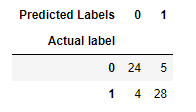


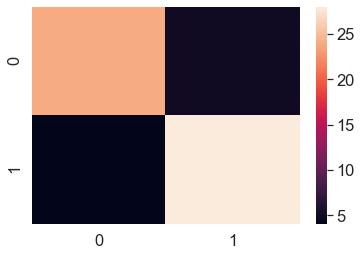

In [103]:
# make confusion matrix with seaborn
import seaborn as sns

#set font
sns.set(font_scale=1.5)

# create confusion matrix
conf_mat= confusion_matrix(y_test,y_preds)

#plot
sns.heatmap(conf_mat)

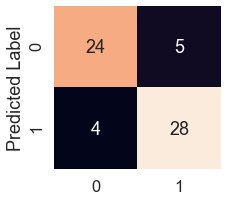

In [104]:
def plot_conf_mat(conf_mat):
    '''
    plot confusion matrix using seaborns heatmap
    '''
    fig,ax =plt.subplots(figsize=(3,3))
    ax= sns.heatmap(conf_mat,
                    annot=True,
                    cbar= False)
    
    plt.xlabel=('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(conf_mat)

classifaction report

128. Evaluating A Classification Model 6 (Classification Report)

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Regression model evaltuation metrics


* 129. Evaluating A Regression Model 1 (R2 Score)

* R squared ~ coefficient of determination 
    * how accurate your model is 
    * compares your model predictions to mean of the targets.  R^2 range from negative infinity to 1.
    * if your model predicts the mean of the targets, R^2 would be 0.
    * if your model predicts a perfect range of numbers your R^2 would be 1.
* mean absolute error (MAE)
    * the avg of the absolute differences between predictions and actual values.
    * how wrong your model is 
* mean squared error (MSE)
    * MSE  is always greater than MAE
    * when bigger errors are more import
    
* want to maximize R^2
* minimize MSE, MAE

In [116]:
#R squared 
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#make data
X= boston_df.drop('target',axis=1)
y= boston_df['target']
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instiaite model

model = RandomForestRegressor()
model.fit(X_train, y_train);



In [117]:
model.score(X_test,y_test)

0.873969014117403

In [118]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean()

21.488235294117654

In [119]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [120]:
r2_score(y_test,y_test)

1.0

mean absolute error (MAE)

In [121]:
from sklearn.metrics import mean_absolute_error

y_preds= model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [123]:
df= pd.DataFrame(data={'actual values':y_test,
                      'predicted values': y_preds})
df['diff']=df['predicted values']-df['actual values']
df

,actual values,predicted values,diff
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


mean squared error (MSE)

In [124]:
from sklearn.metrics import mean_squared_error

y_preds= model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [125]:
#calc MSE by hand

squared=np.square(df['diff'])
squared.mean()

9.24232899019608

# 133. Evaluating A Model With Cross Validation and Scoring Parameter

USING SCORING PARAMETER

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target',axis=1)
y= heart_disease['target']

rf_model = RandomForestClassifier() 


In [127]:
np.random.seed(42)

cv_acc= cross_val_score(rf_model, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [135]:
print('cross validation accuracy is:', np.mean(cv_acc)*100)

cross validation accuracy is: 82.48087431693989


In [137]:
np.random.seed(42)
cv_acc =cross_val_score(rf_model, X,y, cv=5,scoring='accuracy')
print('cross validation accuracy is:', np.mean(cv_acc)*100)

cross validation accuracy is: 82.48087431693989


In [139]:
cv_precision = cross_val_score(rf_model,X,y,cv=5, scoring='precision')
np.mean(cv_precision)

0.8085601538512754

In [140]:
cv_recall = cross_val_score(rf_model, X , y, cv=5, scoring = 'recall')
np.mean(cv_recall)

0.8424242424242424

In [141]:
cv_f1=cross_val_score(rf_model, X , y, cv=5, scoring = 'f1')
np.mean(cv_f1)

0.841476533416832

In [142]:
# regression model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#make data
X= boston_df.drop('target',axis=1)
y= boston_df['target']
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instiaite model

model = RandomForestRegressor()



In [143]:
#R squared
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [145]:
#MAE
np.random.seed(42)
cv_mae=cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366])

In [148]:
#MSE
cv_mse=cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-21.02253826604542

# 134. Evaluating A Model With Scikit-learn Functions

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y= heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
y_preds =rf_model.predict(X_test)

print('accuracy: ', accuracy_score(y_test,y_preds)*100,'%')
print('precision: ', precision_score(y_test, y_preds))
print('recall: ', recall_score(y_test,y_preds))
print('f1: ', f1_score(y_test,y_preds))

accuracy:  85.24590163934425 %
precision:  0.8484848484848485
recall:  0.875
f1:  0.8615384615384615


In [157]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
#make data
X= boston_df.drop('target',axis=1)
y= boston_df['target']
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instiaite model

model = RandomForestRegressor()
model.fit(X_train,y_train)

y_preds=model.predict(X_test)

print('R^2: ', r2_score(y_test,y_preds))
print('MAE: ', mean_absolute_error(y_test, y_preds))
print('MSE: ', mean_squared_error(y_test,y_preds))


R^2:  0.8739690141174031
MAE:  2.1226372549019623
MSE:  9.242328990196082


##  6 Improving predictions through experimentation (hyperparameter tuning)

    * first predictions = baseline predictions.
    * first model = baseline model
* From data perspective
    * Could we collect more data?
    * could we improve our data?
    
 * From model perspective
     * parameters= model find these patterns in data
     * hyper parameters = setting on a model you can adjust to improve ability to find patternns

* three ways to adjust hyper parameters.

    * by hand
    * randomly with random search cv
    * exhaustively with grid search cv

* Tuning hyperparameters by hand
    
    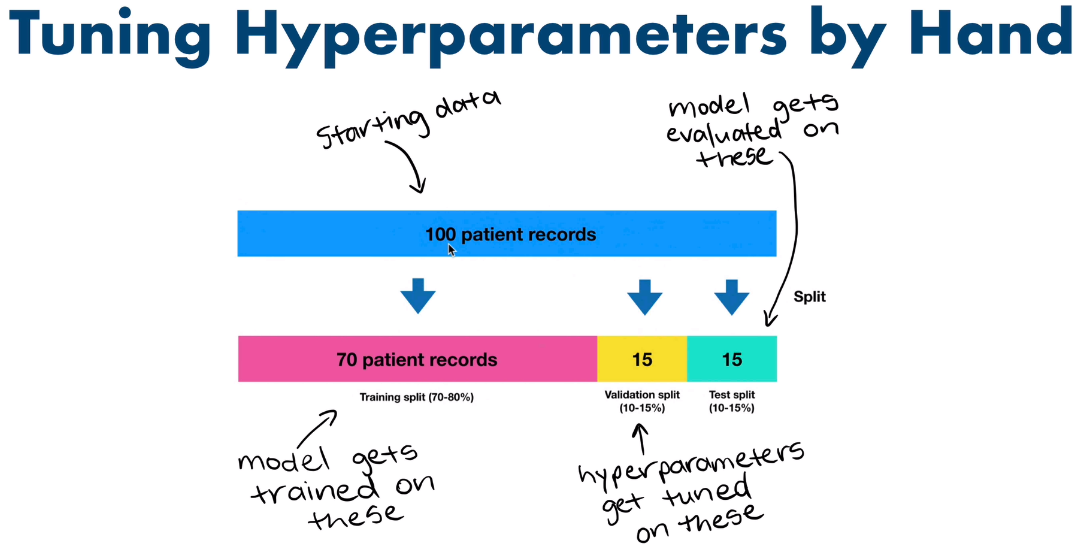

In [159]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

'''
`max_depth`: None,
`'max_features'`: 'auto',
`'min_samples_leaf'`: 1,
`'min_samples_split'`: 2,
`'n_estimators'`: 100,
'''

In [170]:
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1= f1_score(y_true,y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                  'precision': round(precision,2),
                  'recall' : round(recall,2),
                  'f1' : round(f1,2)}
    
    print(metric_dict)

In [171]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease_shuffled= heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop('target',axis=1)
y= heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train, = X[:train_split], y[:train_split]

X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test=X[valid_split:],y[valid_split:]

len(X_train),len(X_valid),len(X_test)

rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train)

y_preds = rf_model.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}


In [174]:
np.random.seed(42)

rf_model_2 = RandomForestClassifier(n_estimators=100) 
rf_model_2.fit(X_train, y_train)


y_preds_2 = rf_model_2.predict(X_valid)

rf_model_2_metrics=evaluate_preds(y_valid,y_preds_2)


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}


# hyperparameter tuning with randomized search CV
   
    *137. Tuning Hyperparameters 2

In [175]:
from sklearn.model_selection import RandomizedSearchCV
grid ={'n_estimators':[10,100,200,500,1000,1200],
      'max_depth':[None,5,10,20,30],
      'max_features': ['auto','sqrt'],
      'min_samples_split': [2,4,6],
      'min_samples_leaf': [1,2,4]}

np.random.seed(42)

#split into x and y
X = heart_disease_shuffled.drop('target',axis=1)
y= heart_disease_shuffled['target']

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#institate model
rf_model = RandomForestClassifier(n_jobs=1)
#set up randomizedsearch cv
rs_rf_model=RandomizedSearchCV(estimator=rf_model,
                              param_distributions=grid,
                              n_iter=10, # number of models to try
                              cv=5,
                              verbose=2)

#fit ranodmized serach cv
rs_rf_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.5s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [178]:
rs_rf_model.best_params_  # best model

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [179]:
rs_y_preds = rs_rf_model.predict(X_test)

rs_metrics = evaluate_preds(y_test,rs_y_preds)

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}



using grid search vc

138. Tuning Hyperparameters 3

In [180]:
grid_2 ={'n_estimators':[10,100,200,500],
      'max_depth':[None],
      'max_features': ['auto','sqrt'],
      'min_samples_split': [6],
      'min_samples_leaf': [1,2]}


In [185]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

#split into x and y
X = heart_disease_shuffled.drop('target',axis=1)
y= heart_disease_shuffled['target']

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#institate model
rf_model = RandomForestClassifier(n_jobs=1)
#set up grid search cv
gs_rf_model=GridSearchCV(estimator=rf_model,
                              param_grid=grid_2,
                              cv=5,
                              verbose=2)

#fit grid serach cv
gs_rf_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   33.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [186]:
gs_rf_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [193]:
gs_y_preds = gs_rf_model.predict(X_test)

gs_metrics = evaluate_preds(y_test,gs_y_preds)

{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}


In [200]:
compare_metrics =pd.DataFrame({'baseline': baseline_metrics,
                              'rf_model_2_metrics': rf_model_2_metrics,
                              'random search': rs_metrics,
                              'grid search' : gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

ValueError: If using all scalar values, you must pass an index

# 7 Saving and loading a pretrained model

* two ways
* `pickle` module
* `joblib`

In [201]:

import pickle
#save existing model to file
pickle.dump(gs_rf_model,open('gridsearch_random_model.pkl','wb'))

In [202]:
#load saved moodel
loaded_pickle_model=pickle.load(open('gridsearch_random_model.pkl','rb'))

In [203]:
os.chdir(r'C:\Users\Dan\Desktop\python code\data')

car_sales=pd.read_csv('car-sales-extended.csv')

In [204]:
#need to do:
# * 1. fill missing data
# * 2. convert data to numbers
# * 3. build model

In [210]:
#getting data
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modeeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#set random seed 
import numpy as np
np.random.seed(42)

#import data and drop missing rows
data = pd.read_csv('car-sales-extended.csv')
data.dropna(subset=['Price'], inplace=True)

# defin differerent features and transformer pipeline
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps =[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'constant', fill_value=4))])

numeric_features=['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))])

#set up preporcessing setes (fill issing values and convert numbers)

preprocessor = ColumnTransformer(
                    transformers =[
                        ('cat',categorical_transformer, categorical_features),
                        ('door', door_transformer,door_feature),
                        ('num',numeric_transformer,numeric_features)])

model = Pipeline(steps=[('preprocessor',preprocessor),
                       ('model',RandomForestRegressor())])

# split data
X = data.drop('Price', axis=1)
y=data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#fit and score model
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.3187859776018187